<a href="https://colab.research.google.com/github/sayanbanerjee32/lang_detect/blob/main/pytorch_133_langs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount gdrive for data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# file locations
tar_file_loc = '/content/drive/MyDrive/lang_detection/data/sentences.tar.bz2'
dest_loc = '/tmp'
file_name = 'sentences.csv'
num_languages = 133
model_save_path = '/content/drive/MyDrive/lang_detection/models/'

In [ ]:
import pandas as pd
import tarfile
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [ ]:
# extrtract tar file
tar = tarfile.open(tar_file_loc, "r:bz2")  
tar.extractall(path = dest_loc)
tar.close()

In [ ]:
# read lines to understand structure
with open(dest_loc +'/' + file_name) as file:
    lines = file.readlines()
    lines = [line.strip() for line in lines]

In [ ]:
# see few samples
lines[0:10]

['1\tcmn\t我們試試看！',
 '2\tcmn\t我该去睡觉了。',
 '3\tcmn\t你在干什麼啊？',
 '4\tcmn\t這是什麼啊？',
 '5\tcmn\t今天是６月１８号，也是Muiriel的生日！',
 '6\tcmn\t生日快乐，Muiriel！',
 '7\tcmn\tMuiriel现在20岁了。',
 '8\tcmn\t密码是"Muiriel"。',
 '9\tcmn\t我很快就會回來。',
 '10\tcmn\t我不知道。']

In [ ]:
# read data in pandas
sent_df = pd.read_csv(dest_loc +'/' + file_name, sep = '\t', names = ['id','label','text'])
sent_df.head()

,id,label,text
0,1,cmn,我們試試看！
1,2,cmn,我该去睡觉了。
2,3,cmn,你在干什麼啊？
3,4,cmn,這是什麼啊？
4,5,cmn,今天是６月１８号，也是Muiriel的生日！


In [ ]:
# is there blank label
sent_df['label'].fillna('unk',inplace  = True)
sent_df.loc[sent_df['label'] == 'unk',:]

,id,label,text
387366,404564,unk,Lèu gāi dịdiang?
387368,404566,unk,Kuăilāk sí mitgāi?
387372,404570,unk,Dó Hānggok nạng dăn mitgāi uẹ?
388306,405522,unk,Lèu kiá dịgŏ?
388307,405523,unk,Lèu miān mitgāi?
388308,405524,unk,Uà sí Diōjiunāng.
4655179,4962310,unk,厝漏閣抵著透暝雨。
5786464,6142175,unk,我昨暗睏十一點鐘久。
5786465,6142176,unk,阮阿叔有去過芬蘭。
5786466,6142177,unk,阮佇厝裡攏講台語。


In [ ]:
# is there blank texts
sent_df.loc[sent_df['text'].isnull(),:].shape, sent_df.loc[sent_df['text'] == '',:].shape

((0, 3), (0, 3))

In [ ]:
# remove records where label not known
sent_df = sent_df.loc[sent_df['label'] != 'unk',:]
len(sent_df['label'].unique())

402

In [ ]:
# create test split
def get_train_test_split(df):
    train_ids, test_ids = next(StratifiedKFold(n_splits=5,random_state=1).split(df.id, df.label))
    print(f"Test: {len(test_ids)}, Train: {len(train_ids)}, Total: {len(df)}")
    dummy = [False] * len(df)
    com_list = dummy[:]
    for index in test_ids: com_list[index] = True
    return com_list

In [ ]:
train_test_bool = get_train_test_split(sent_df)
sum(train_test_bool)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Test: 1977424, Train: 7909695, Total: 9887119


1977424

In [ ]:
# keep test separate
test_df = sent_df.loc[train_test_bool,:]
test_df.shape

(1977424, 3)

In [ ]:
# Training df
train_df = sent_df.loc[list(~np.array(train_test_bool)),:]
train_df.shape

(7909695, 3)

In [ ]:
# is validation identified
train_df['is_valid'] = get_train_test_split(train_df)
train_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Test: 1581939, Train: 6327756, Total: 7909695


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,label,text,is_valid
111285,116355,jpn,彼の発言で私の希望は失われた。,True
111286,116356,jpn,彼の発言が舌戦の火蓋を切った。,True
111287,116357,jpn,彼の発言がゴタゴタを起こした。,True
111288,116358,jpn,彼の発言が舌戦の火蓋をきったことになった。,True
111289,116359,jpn,彼の発見は輸送における革命をもたらした。,True


(7909695, 7890587)

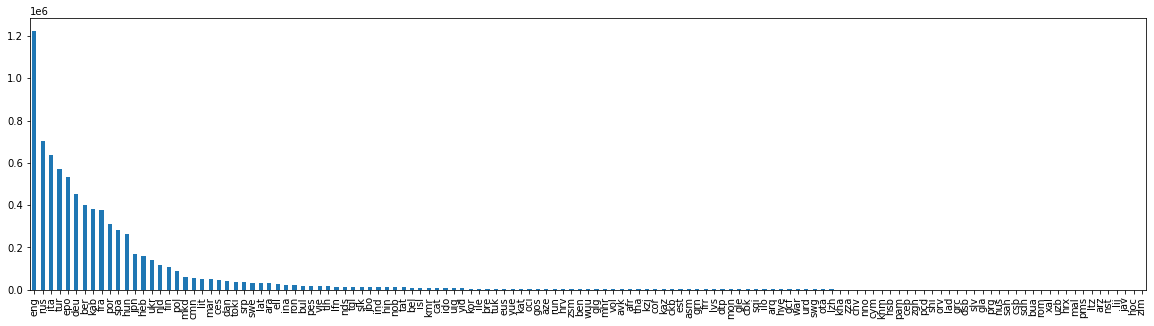

In [ ]:
# create a subsample
cound_df = train_df['label'].value_counts()
sample_labels = cound_df[:num_languages].index.tolist()

train_csv_sample = train_df.loc[train_df['label'].isin(sample_labels),:]
train_csv_sample['label'].value_counts().plot.bar(figsize = [20,5])
len(train_df), len(train_csv_sample)

In [ ]:
# to get an idea how many observations should be kept to deal with the large volume
train_csv_sample['label'].value_counts().median()

3743.0

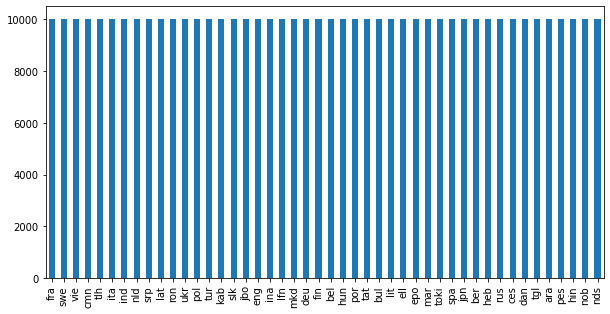

In [ ]:
# downsample where number of observations for a language is more than 10000
size = 10000        # sample size
replace = False  # with replacement
dn_smpl_lang = list(train_csv_sample['label'].value_counts()[train_csv_sample['label'].value_counts() > size].index)
train_sub_sample_lg = train_csv_sample.loc[train_csv_sample.label.isin(dn_smpl_lang),:].copy()
np.random.seed(1)
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
train_sub_sample_lg = train_sub_sample_lg.groupby('label', as_index=False).apply(fn)
train_sub_sample_lg['label'].value_counts().plot.bar(figsize = [10,5])

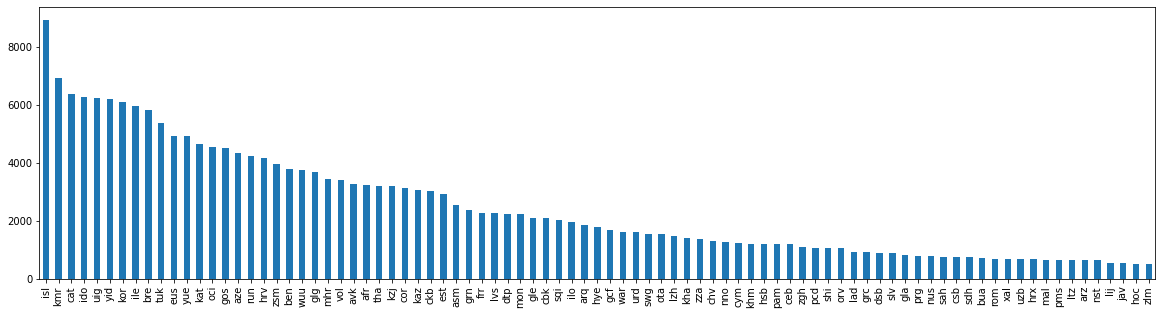

In [ ]:
# distribution where number of observation for each language is less than 10000
train_sub_sample_sh = train_csv_sample.loc[~train_csv_sample.label.isin(dn_smpl_lang),:].copy()
train_sub_sample_sh['label'].value_counts().plot.bar(figsize = [20,5])

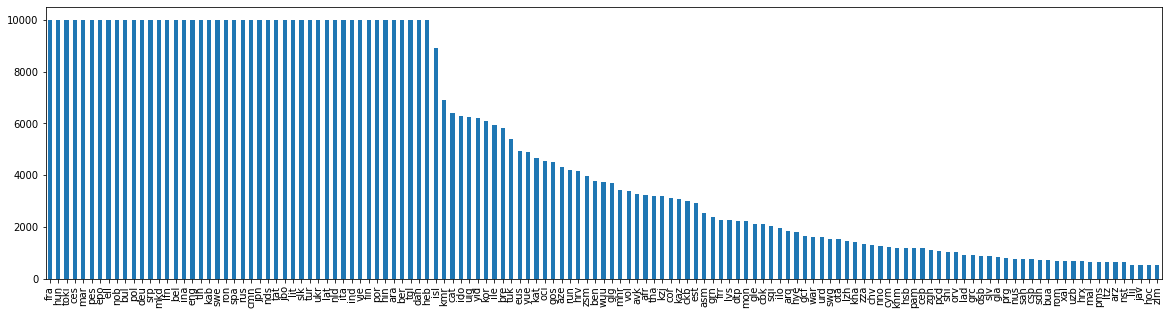

In [ ]:
train_sub_sample = pd.concat([train_sub_sample_lg,train_sub_sample_sh],axis = 0)
train_sub_sample['label'].value_counts().plot.bar(figsize = [20,5])

In [ ]:
# language list for test sub sample and inference
lang_labels = train_sub_sample['label'].unique().tolist()
test_sub_sample = test_df.loc[test_df['label'].isin(lang_labels)]
test_sub_sample.shape,test_df.shape

((1972648, 3), (1977424, 3))

In [ ]:
# Save the list of 133 languages for model building and inference
from sklearn.externals import joblib
joblib.dump(lang_labels, model_save_path + 'pt_supported_languages.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/drive/MyDrive/lang_detection/models/pt_supported_languages.pkl']

## Torch Model

In [ ]:
%%capture
!pip install datasets

In [ ]:
import functools
import tqdm
import sys
import matplotlib.pyplot as plt

#deal with tensors
import torch
import torchtext
from datasets import Dataset
#handling text data
from torchtext.vocab import build_vocab_from_iterator

import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import f1_score

In [ ]:
# dataset for traing, validation and test
train_data = Dataset.from_pandas(train_sub_sample.loc[train_sub_sample.is_valid == False,['label','text']].reset_index(drop=True))
valid_data = Dataset.from_pandas(train_sub_sample.loc[train_sub_sample.is_valid == True,['label','text']].reset_index(drop=True))
test_data = Dataset.from_pandas(test_sub_sample.loc[:,['label','text']])

In [ ]:
# character tokenizer
tokenizer = lambda x:list(x)
def tokenize_data(example, tokenizer, max_length):
    tokens = tokenizer(example['text'])[:max_length]
    length = len(tokens)
    return {'tokens': tokens, 'length': length}

In [ ]:
# tokenize sentences with max_length restrictions for number of tokens
max_length = 256
train_data = train_data.map(tokenize_data, fn_kwargs={'tokenizer': tokenizer, 'max_length': max_length})
valid_data = valid_data.map(tokenize_data, fn_kwargs={'tokenizer': tokenizer, 'max_length': max_length})
test_data = test_data.map(tokenize_data, fn_kwargs={'tokenizer': tokenizer, 'max_length': max_length})

  0%|          | 0/540515 [00:00<?, ?ex/s]

  0%|          | 0/134996 [00:00<?, ?ex/s]

  0%|          | 0/1972648 [00:00<?, ?ex/s]

In [ ]:
# create vocabulary from character tokens generated from training data
min_freq = 5
special_tokens = ['<unk>', '<pad>']

vocab = torchtext.vocab.build_vocab_from_iterator(train_data['tokens'],
                                                  min_freq=min_freq,
                                                  specials=special_tokens)
# add special tokens for unknown character and padding
unk_index = vocab['<unk>']
pad_index = vocab['<pad>']
vocab.set_default_index(unk_index)

In [ ]:
# save vocab for inference
from sklearn.externals import joblib
joblib.dump(vocab, model_save_path + 'pytorch_133_langs_vocab')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/drive/MyDrive/lang_detection/models/pytorch_133_langs_vocab']

In [ ]:
# util function for token to id
def numericalize_data(example, vocab):
    ids = [vocab[token] for token in example['tokens']]
    return {'ids': ids}
# util function for label to id
def label_to_idx(example, lang_labels):
    return {'label':lang_labels.index(example['label'])}

In [ ]:
# token to id mapping for all 3 data sets
train_data = train_data.map(numericalize_data, fn_kwargs={'vocab': vocab})
valid_data = valid_data.map(numericalize_data, fn_kwargs={'vocab': vocab})
test_data = test_data.map(numericalize_data, fn_kwargs={'vocab': vocab})

  0%|          | 0/540515 [00:00<?, ?ex/s]

  0%|          | 0/134996 [00:00<?, ?ex/s]

  0%|          | 0/1972648 [00:00<?, ?ex/s]

In [ ]:
# label to id for 3 data sets
train_data = train_data.map(label_to_idx, fn_kwargs={'lang_labels': lang_labels})
valid_data = valid_data.map(label_to_idx, fn_kwargs={'lang_labels': lang_labels})
test_data = test_data.map(label_to_idx, fn_kwargs={'lang_labels': lang_labels})

  0%|          | 0/540515 [00:00<?, ?ex/s]

  0%|          | 0/134996 [00:00<?, ?ex/s]

  0%|          | 0/1972648 [00:00<?, ?ex/s]

In [ ]:
# convert to torch tensors
train_data = train_data.with_format(type='torch', columns=['ids', 'label', 'length'])
valid_data = valid_data.with_format(type='torch', columns=['ids', 'label', 'length'])
test_data = test_data.with_format(type='torch', columns=['ids', 'label', 'length'])

In [ ]:
# see example data
train_data[0]

{'ids': tensor([ 55,  31,   2,  80,  48,  75, 286,  80,   2, 220,  48,   2,  57,  57,
          51, 140,  90,   2,  80, 374,  90,  75,   2,  75,  90, 374,  90,   2,
          31,  55,  87, 266,  90,  65,  55, 256,  12]),
 'label': tensor(0),
 'length': tensor(37)}

In [ ]:
# Model class
class LangDetect(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional,
                 dropout_rate, pad_index):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=pad_index)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, bidirectional=bidirectional,
                            dropout=dropout_rate, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, ids, length):
        # ids = [batch size, seq len]
        # length = [batch size]
        embedded = self.dropout(self.embedding(ids))
        # embedded = [batch size, seq len, embedding dim]
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, length, batch_first=True, 
                                                            enforce_sorted=False)
        packed_output, (hidden, cell) = self.lstm(packed_embedded)
        # hidden = [n layers * n directions, batch size, hidden dim]
        # cell = [n layers * n directions, batch size, hidden dim]
        output, output_length = nn.utils.rnn.pad_packed_sequence(packed_output)
        # output = [batch size, seq len, hidden dim * n directions]
        if self.lstm.bidirectional:
            hidden = self.dropout(torch.cat([hidden[-1], hidden[-2]], dim=-1))
            # hidden = [batch size, hidden dim * 2]
        else:
            hidden = self.dropout(hidden[-1])
            # hidden = [batch size, hidden dim]
        prediction = self.fc(hidden)
        # prediction = [batch size, output dim]
        return prediction

In [ ]:
# model hyper parameters
vocab_size = len(vocab)
embedding_dim = 150
hidden_dim = 150
output_dim = len(train_data.unique('label'))
n_layers = 1
bidirectional = True
dropout_rate = 0.5
# instantiate model
model = LangDetect(vocab_size, embedding_dim, hidden_dim, output_dim, 
                   n_layers, bidirectional, dropout_rate, pad_index)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 1,097,533 trainable parameters


In [ ]:
# initialize model weights for LSTM and Linear layer
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight)
        nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):
        for name, param in m.named_parameters():
            if 'bias' in name:
                nn.init.zeros_(param)
            elif 'weight' in name:
                nn.init.orthogonal_(param)

model.apply(initialize_weights)

LangDetect(
  (embedding): Embedding(4634, 150, padding_idx=1)
  (lstm): LSTM(150, 150, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=300, out_features=133, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [ ]:
# model configurations
lr = 5e-4
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
# collate function for data loaders
def collate(batch, pad_index):
    batch_ids = [i['ids'] for i in batch]
    batch_ids = nn.utils.rnn.pad_sequence(batch_ids, padding_value=pad_index, batch_first=True)
    batch_length = [i['length'] for i in batch]
    batch_length = torch.stack(batch_length)
    batch_label = [i['label'] for i in batch]
    batch_label = torch.stack(batch_label)
    batch = {'ids': batch_ids,
             'length': batch_length,
             'label': batch_label}
    return batch

In [ ]:
# create data loaders for all 3 data sets
batch_size = 512
collate = functools.partial(collate, pad_index=pad_index)

train_dataloader = torch.utils.data.DataLoader(train_data, 
                                               batch_size=batch_size, 
                                               collate_fn=collate, 
                                               shuffle=True)

valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, collate_fn=collate)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, collate_fn=collate)

In [ ]:
# training loop for mini batchs
def train(dataloader, model, criterion, optimizer, device):

    model.train()
    epoch_losses = []
    epoch_accs = []
    epoch_label = []
    epoch_predicted = []

    for batch in tqdm.tqdm(dataloader, desc='training...', file=sys.stdout):
        ids = batch['ids'].to(device)
        length = batch['length']
        label = batch['label'].to(device)
        prediction = model(ids, length)
        loss = criterion(prediction, label)
        accuracy,label_np, predicted_classes_np = get_performance(prediction, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())
        epoch_label.extend(label_np)
        epoch_predicted.extend(predicted_classes_np)

    return epoch_losses, epoch_accs, epoch_label, epoch_predicted
# evaluate function to calculate performance metrics after each epoch
def evaluate(dataloader, model, criterion, device):
    
    model.eval()
    epoch_losses = []
    epoch_accs = []
    epoch_label = []
    epoch_predicted = []


    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader, desc='evaluating...', file=sys.stdout):
            ids = batch['ids'].to(device)
            length = batch['length']
            label = batch['label'].to(device)
            prediction = model(ids, length)
            loss = criterion(prediction, label)
            accuracy,label_np, predicted_classes_np = get_performance(prediction, label)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy.item())
            epoch_label.extend(label_np)
            epoch_predicted.extend(predicted_classes_np)

    return epoch_losses, epoch_accs, epoch_label, epoch_predicted

def get_performance(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    correct_predictions = predicted_classes.eq(label).sum()
    accuracy = correct_predictions / batch_size
    predicted_classes_np = predicted_classes.detach().cpu().numpy()
    label_np = label.detach().cpu().numpy()
    return accuracy, label_np, predicted_classes_np

In [ ]:
# main training loop
n_epochs = 20
best_valid_loss = float('inf')

train_losses = []
train_accs = []
train_labels = []
train_predicteds = []

valid_losses = []
valid_accs = []
valid_labels = []
valid_predicteds = []

for epoch in range(n_epochs):

    train_loss, train_acc, train_label, train_predicted = train(train_dataloader, model, criterion, optimizer, device)
    valid_loss, valid_acc, valid_label, valid_predicted = evaluate(valid_dataloader, model, criterion, device)

    # gather training perf metrics
    train_losses.extend(train_loss)
    train_accs.extend(train_acc)
    train_labels.extend(train_label)
    train_predicteds.extend(train_predicted)

    # gather validation perf metrics
    valid_losses.extend(valid_loss)
    valid_accs.extend(valid_acc)
    valid_labels.extend(valid_label)
    valid_predicteds.extend(valid_predicted)
    
    epoch_train_loss = np.mean(train_loss)
    epoch_train_acc = np.mean(train_acc)
    epoch_train_micro_f1 = f1_score(train_labels, train_predicteds, average = 'micro')
    epoch_train_macro_f1 = f1_score(train_labels, train_predicteds, average = 'macro')
    epoch_train_weighted_f1 = f1_score(train_labels, train_predicteds, average = 'weighted')
    
    epoch_valid_loss = np.mean(valid_loss)
    epoch_valid_acc = np.mean(valid_acc)
    epoch_valid_micro_f1 = f1_score(valid_labels, valid_predicteds, average = 'micro')
    epoch_valid_macro_f1 = f1_score(valid_labels, valid_predicteds, average = 'macro')
    epoch_valid_weighted_f1 = f1_score(valid_labels, valid_predicteds, average = 'weighted')
    
    # save model if validation loss is better than erlier best
    if epoch_valid_loss < best_valid_loss:
        best_valid_loss = epoch_valid_loss
        torch.save(model.state_dict(), model_save_path + 'pytorch_133_langs.pt')
    
    print(f'epoch: {epoch+1}')
    print(f'train_loss: {epoch_train_loss:.3f}, train_acc: {epoch_train_acc:.3f},\
            train_micro_f1: {epoch_train_micro_f1:.3f}, train_macro_f1:{epoch_train_macro_f1:.3f}, \
            train_weighted_f1: {epoch_train_weighted_f1:.3f}')
    print(f'valid_loss: {epoch_valid_loss:.3f}, valid_acc: {epoch_valid_acc:.3f},\
            valid_micro_f1: {epoch_valid_micro_f1:.3f}, valid_macro_f1:{epoch_valid_macro_f1:.3f}, \
            valid_weighted_f1: {epoch_valid_weighted_f1:.3f}')

evaluating...: 100%|██████████| 264/264 [00:37<00:00,  7.08it/s]
epoch: 1
train_loss: 1.819, train_acc: 0.532,            train_micro_f1: 0.532, train_macro_f1:0.400,             train_weighted_f1: 0.513
valid_loss: 0.799, valid_acc: 0.750,            valid_micro_f1: 0.750, valid_macro_f1:0.611,             valid_weighted_f1: 0.732
evaluating...: 100%|██████████| 264/264 [00:37<00:00,  7.08it/s]
epoch: 2
train_loss: 0.858, train_acc: 0.739,            train_micro_f1: 0.635, train_macro_f1:0.523,             train_weighted_f1: 0.622
valid_loss: 0.592, valid_acc: 0.806,            valid_micro_f1: 0.778, valid_macro_f1:0.658,             valid_weighted_f1: 0.765
evaluating...: 100%|██████████| 264/264 [00:37<00:00,  7.06it/s]
epoch: 3
train_loss: 0.683, train_acc: 0.787,            train_micro_f1: 0.686, train_macro_f1:0.585,             train_weighted_f1: 0.675
valid_loss: 0.489, valid_acc: 0.835,            valid_micro_f1: 0.797, valid_macro_f1:0.692,             valid_weighted_f1: 0.78

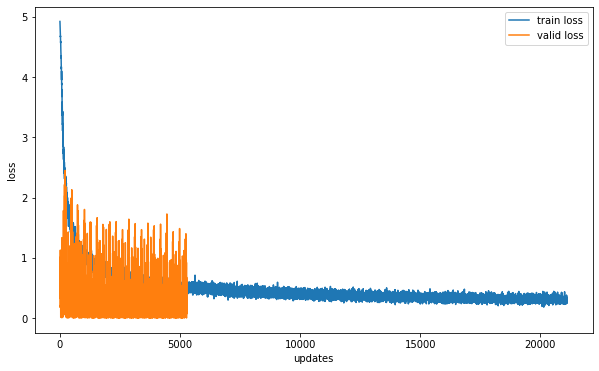

In [ ]:
# training vs validation loss 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(train_losses, label='train loss')
ax.plot(valid_losses, label='valid loss')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('loss');

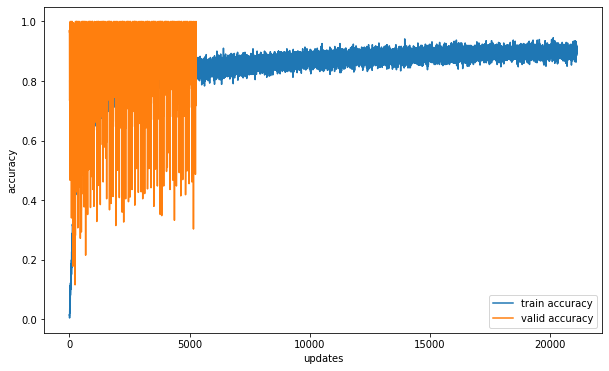

In [ ]:
# training vs validation accuracy
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(train_accs, label='train accuracy')
ax.plot(valid_accs, label='valid accuracy')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('accuracy');

## Performance on Test data

In [ ]:
# load model parameters
model.load_state_dict(torch.load(model_save_path + 'pytorch_133_langs.pt'))

test_loss, test_acc, test_label, test_predicted = evaluate(test_dataloader,
                                                           model, criterion, device)

epoch_test_loss = np.mean(test_loss)
epoch_test_acc = np.mean(test_acc)

epoch_test_micro_f1 = f1_score(test_label, test_predicted, average = 'micro')
epoch_test_macro_f1 = f1_score(test_label, test_predicted, average = 'macro')
epoch_test_weighted_f1 = f1_score(test_label, test_predicted, average = 'weighted')

print(f'test_loss: {epoch_test_loss:.3f}, test_acc: {epoch_test_acc:.3f},\
        test_micro_f1: {epoch_test_micro_f1:.3f}, test_macro_f1:{epoch_test_macro_f1:.3f}, \
        test_weighted_f1: {epoch_test_weighted_f1:.3f}')

evaluating...: 100%|██████████| 3853/3853 [09:24<00:00,  6.83it/s]
test_loss: 0.219, test_acc: 0.918,        test_micro_f1: 0.918, test_macro_f1:0.759,         test_weighted_f1: 0.922


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(test_label, test_predicted))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7597
           1       0.56      0.96      0.71      2528
           2       0.62      0.82      0.71    100757
           3       0.43      0.87      0.58      4900
           4       0.95      0.91      0.93     11993
           5       0.99      0.96      0.98     13974
           6       0.82      0.79      0.80     10138
           7       0.99      0.98      0.99    113629
           8       1.00      1.00      1.00      6861
           9       1.00      0.97      0.98    305809
          10       1.00      0.95      0.97    133500
          11       0.99      0.98      0.98     26797
          12       0.99      0.96      0.98     94763
          13       1.00      0.99      1.00     39562
          14       0.98      1.00      0.99      2880
          15       0.99      0.98      0.98     66264
          16       0.43      0.95      0.59      5448
          17       0.51    

In [ ]:
# prediction function
def detect_lang(text, model, tokenizer, vocab, device,lang_labels):
    tokens = tokenizer(text)
    ids = [vocab[t] for t in tokens]
    length = torch.LongTensor([len(ids)])
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    prediction = model(tensor, length).squeeze(dim=0)
    probability = torch.softmax(prediction, dim=-1)
    predicted_class = prediction.argmax(dim=-1).item()
    predicted_probability = probability[predicted_class].item()
    return lang_labels[predicted_class], predicted_probability

In [ ]:
# try one sentence
text = "彼の発言で私の希望は失われた。"
detect_lang(text, model, tokenizer, vocab, device,lang_labels)

('jpn', 1.0)